## **Biodata**
Nama     : **Muhamad Ilyas**               
Email    : **181240000831@unisnu.ac.id**   
Domisili : **Kabupaten Jepara, Jawa Tengah**

# **Domain Rekomendasi Post**

## **Domain Proyek**

Postingan adalah tindakan dalam mengirim sebuah konten ke internet ke media maya, atau sebuah publikasi yang menggunakan media-media elektronik berbasis online. Dengan seiring semakin berkembangnya dunia elektronik membuat konten semakin mudah dilakukan dan dalam waktu yang singkat dapat dilihat oleh banyak orang. Tak jarang juga konten tersebut menjadi *trending* atau mendapatkan perhatian dari banyak orang.

Agar konten yang dimuat atau dipublish terlebih pada konten artikel mudah untuk dicari para pembaca yang sesuai dengan preferensinya maka perlukan adanya sistem rekomendasi.

Penelitian ini bertujuan untuk membuat sistem rekomendasi untuk para pembaca konten artikel. Dan dalam penyelesaiannya menggunakan metode pendekatan **Content-based Filtering** dan **Collaborative Filtering**.

**Rujukan** :

[Jurnal MDPI-"Recommendation Systems: Algorithms, Challenges, Metrics, and Business Opportunities"](https://www.mdpi.com/2076-3417/10/21/7748)

## **Business Understanding**
Banyak pembaca konten artikel ketika mencari artikel untuk dibaca, mereka mengalami kesulitan dalam mencari konten artikel lain yang sesuai dengan kesukaannya. Dan diperlukan sistem rekomendasi untuk mengatasinya.

### **Problem Statements**
Bagaimana cara merekomendasi konten artikel untuk para pembaca sesuai dengan apa yang mereka inginkan menggunakan teknik machine learning ?

### **Goals**
Tujuan yang ingin dicapai  adalah dengan membuatkan sistem rekomendasi konten artikel untuk para pembaca berdasarkan file dataset mengenai data post, data user dan data view.

### **Solution Statements**
Pemecahan masalah dalam hal ini saya mengajukan metode pendekatan **Content-based Filtering** dan **Collaborative Filtering**.


*   **Content-based Filtering**, adalah algoritma sistem rekomendasi yang bekerja dengan cara merekomendasikan item yang mirip dengan item yang disukai oleh pengguna tersebut pada masa lalu. Pada projek ini merekomendasikan jenis konten artikel yang sesuai dengan preferensi para pembaca tersebut. Kemiripan yang dimaksud berdasarkan pada kategori post tersebut.
*   **Collaborative Filtering**, adalah algoritma sistem rekomendasi yang bergantung pada feedback pengguna, sistem ini berdasarkan kesamaan antar pengguna. pada projek ini merekomendasikan jenis konten artikel yang pernah diberi rating atau review tersebut. Kemiripan yang dimaksud berdasarkan pada kategori post tersebut.



## **Data Understanding**
Dataset yang saya gunakan diambil dari [kaggle "Post Recommendations Dataset"](https://www.kaggle.com/vatsalparsaniya/post-pecommendation?select=view_data.csv), yang terdiri dari 3 file CSV yaitu :
1. Users Data, dengan data yang berisi 500 data
1. Posts Data, dengan data yang berisi 6000 data
1. View Data, dengan data yang berisi 71800 data

Dengan variabel tabel sebagai berikut :
**User Data**
- user_id : Mempresentasikan ID untuk pengguna
- first_name : Mempresentasikan nama depan pengguna
- last_name : Mempresentasikan nama belakang pengguna
- gender : Mempresentasikan jenis kelamin pengguna
- avatar : Mempresentasikan avatar pengguna
- city : Mempresentasikan kota pengguna
- academics : Mempresentasikan pendidikan pengguna

**Posts Data**
- post_id : Mempresentasikan ID untuk post
- title : Mempresentasikan judul postingan
- category : Mempresentasikan kategori postingan

**View Data**
- user_id : Mempresentasikan ID untuk pengguna
- post_id : Mempresentasikan ID untuk post
- time_stamp : Mempresentasikan waktu pengguna melihat post

### **Menload Library**

**Menghubungkan dengan Google Drive**

In [1]:
#menghubungkan dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import Library**

In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse as sp
from sklearn.metrics import pairwise as pw
import seaborn as sns

In [4]:
!pip install lightfm

from lightfm import LightFM
from lightfm.evaluation import precision_at_k, recall_at_k, auc_score, reciprocal_rank

     |████████████████████████████████| 310 kB 10.0 MB/s 
  Created wheel for lightfm: filename=lightfm-1.16-cp37-cp37m-linux_x86_64.whl size=705358 sha256=303374cc3e89f8a2c932286b53c44e736eae1309f4e9e0d82be6ce3251d2d8c0
  Stored in directory: /root/.cache/pip/wheels/f8/56/28/5772a3bd3413d65f03aa452190b00898b680b10028a1021914
Successfully built lightfm


### **Load Dataset**

**Membaca Dataset**

In [5]:
#membaca file
post = pd.read_csv('/content/drive/MyDrive/Dataset/Rekomendasi_Posting/post_data.csv')
user = pd.read_csv('/content/drive/MyDrive/Dataset/Rekomendasi_Posting/user_data.csv')
view = pd.read_csv('/content/drive/MyDrive/Dataset/Rekomendasi_Posting/view_data.csv')

print('Jumlah data pada buku: ', len(post.post_id.unique()))
print('Jumlah data pada ranting: ', len(user.user_id.unique()))
print('Jumlah data pada pengguna: ', len(view.user_id.unique()))

Jumlah data pada buku:  6000
Jumlah data pada ranting:  500
Jumlah data pada pengguna:  500


**Post**

In [6]:
post.head()

,title,category,post_id
0,Find A Quick Way To GRAPHIC,graphic,10260109
1,How To Sell CRAFT,Craft,39550285
2,POLITICS An Incredibly Easy Method That Works ...,politics,935118791
3,5 Brilliant Ways To Use POLITICAL,political,151805043
4,How To Make Your MATHEMATICS Look Amazing In ...,Mathematics,995833095


## **Data Preparation**

####**Melakukan Eksplorasi pada variabel Post**

**Melihat Data**

In [7]:
#melihat variabel post
post

,title,category,post_id
0,Find A Quick Way To GRAPHIC,graphic,10260109
1,How To Sell CRAFT,Craft,39550285
2,POLITICS An Incredibly Easy Method That Works ...,politics,935118791
3,5 Brilliant Ways To Use POLITICAL,political,151805043
4,How To Make Your MATHEMATICS Look Amazing In ...,Mathematics,995833095
...,...,...,...
5995,Who Else Wants To Be Successful With PROGRAMMING,programming,815625033
5996,Avoid The Top 10 SCIENCE Mistakes,science,870247682
5997,7 and a Half Very Simple Things You Can Do To...,drawing,856393394
5998,Why Everything You Know About ZOOLOGY Is A Lie,zoology,152219066


**Cek tipe data**

In [8]:
#Eksplorasi variabel post
post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     6000 non-null   object
 1   category  6000 non-null   object
 2   post_id   6000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 140.8+ KB


**Describe data**

In [9]:
post.describe()

,post_id
count,6.000000e+03
mean,5.015634e+08
std,2.872069e+08
min,1.010992e+07
25%,2.513867e+08
50%,4.977584e+08
75%,7.487327e+08
max,9.999538e+08


**Cek Kategori**

In [10]:
#melihat data entri kategori pada post
print('Banyak Post: ', len(post.post_id.unique()))
print('Jenis-Jenis Kategori: ', post.category.unique())

Banyak Post:  6000
Jenis-Jenis Kategori:  ['graphic' 'Craft' 'politics' 'political' 'Mathematics' 'zoology'
 'business' 'dance' 'banking' 'HR management' 'art' 'science' 'Music'
 'operating system' 'Fashion Design' 'programming' 'painting'
 'photography' 'drawing' 'GST']


####**Melakukan Eksplorasi pada variabel User**

**Melihat Data**

In [11]:
#melihat fitur pada variabel user
user

,user_id,first_name,last_name,gender,avatar,city,academics
0,5eece14efc13ae6609000000,Milena,Lacelett,Female,https://robohash.org/quisidomnis.png?size=50x5...,Blagoveshchensk,undergraduate
1,5eece14efc13ae6609000001,Nolan,Satcher,Male,https://robohash.org/dignissimosrepudiandaedol...,Wufeng,undergraduate
2,5eece14efc13ae6609000002,Eveleen,Cotterell,Female,https://robohash.org/remomnissuscipit.png?size...,Barra Bonita,undergraduate
3,5eece14efc13ae6609000003,Petrina,Berr,Female,https://robohash.org/estquasconsectetur.png?si...,San Angelo,undergraduate
4,5eece14efc13ae6609000004,Saunderson,Duquesnay,Male,https://robohash.org/nullaaest.png?size=50x50&...,Olszówka,graduate
...,...,...,...,...,...,...,...
495,5eece14ffc13ae66090001ef,Jada,Capaldi,Female,https://robohash.org/optioperferendisnobis.png...,Pau,undergraduate
496,5eece14ffc13ae66090001f0,Robin,Kike,Male,https://robohash.org/voluptatemestenim.png?siz...,Komendantsky aerodrom,graduate
497,5eece14ffc13ae66090001f1,Gwenneth,Dally,Female,https://robohash.org/etnihilqui.png?size=50x50...,Łomża,graduate
498,5eece14ffc13ae66090001f2,Nickolas,McTrustram,Male,https://robohash.org/nonquiaut.png?size=50x50&...,Bani,graduate


**Cek tipe data**

In [12]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    object
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   gender      500 non-null    object
 4   avatar      500 non-null    object
 5   city        500 non-null    object
 6   academics   500 non-null    object
dtypes: object(7)
memory usage: 27.5+ KB


**Preferensi Variabel**

In [13]:
#Pola preferensi variabel user
print(user.shape)

(500, 7)


####**Melakukan eksplorasi pada variabel View**

**melihat data**

In [14]:
#melihat fitur pada variabel user
view

,user_id,post_id,time_stamp
0,5eece14ffc13ae660900008b,136781766,01/01/2019 01:30 PM
1,5eece14efc13ae660900003c,43094523,01/01/2019 01:33 PM
2,5eece14efc13ae6609000025,42428071,01/01/2019 01:43 PM
3,5eece14ffc13ae66090001d4,76472880,01/01/2019 01:54 PM
4,5eece14ffc13ae66090000ac,202721843,01/01/2019 02:00 PM
...,...,...,...
71795,5eece14ffc13ae660900018c,615389604,12/31/2019 12:37 AM
71796,5eece14ffc13ae660900010c,348689108,12/31/2019 12:50 PM
71797,5eece14ffc13ae6609000190,619052165,12/31/2019 12:51 AM
71798,5eece14efc13ae6609000067,426384418,12/31/2019 12:51 PM


**Cek tipe data**

In [15]:
view.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71800 entries, 0 to 71799
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     71800 non-null  object
 1   post_id     71800 non-null  int64 
 2   time_stamp  71800 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


**Describe data**

In [16]:
#melihat distribusi view
view.describe()

,post_id
count,7.180000e+04
mean,5.002652e+08
std,2.868640e+08
min,1.010992e+07
25%,2.505360e+08
50%,4.976716e+08
75%,7.472500e+08
max,9.999538e+08


**Preferensi variabel**

In [17]:
#Pola preferensi variabel view
print(view.shape)

(71800, 3)


In [18]:
#melihat jumlah pengguna yang melakukan view
print('Jumlah user_id: ', len(view.user_id.unique()))
print('Jumlah post_id: ', len(view.post_id.unique()))
print('Jumlah yang melakukan view: ', len(view.time_stamp))

Jumlah user_id:  500
Jumlah post_id:  6000
Jumlah yang melakukan view:  71800


### **Menggabungkan/Join file user, view dan post**

In [19]:
#menggabungkan seluruh user_id pada satu kategori user
user_view = np.concatenate((
    user.user_id.unique(),
    view.user_id.unique()
))

#mengurutkan data dan menghapus data yang sama
user_view = np.sort(np.unique(user_view))

print('Jumlah seluruh User: ', len(user_view))

Jumlah seluruh User:  500


In [20]:
# Menggabungkan dataframe post dengan view berdasarkan nilai post_id
posting = pd.merge(view, post, on='post_id', how='left')
posting

,user_id,post_id,time_stamp,title,category
0,5eece14ffc13ae660900008b,136781766,01/01/2019 01:30 PM,Sexy BANKING,banking
1,5eece14efc13ae660900003c,43094523,01/01/2019 01:33 PM,10 Ways To Immediately Start Selling PROGRAMMING,programming
2,5eece14efc13ae6609000025,42428071,01/01/2019 01:43 PM,DRAWING Adventures,drawing
3,5eece14ffc13ae66090001d4,76472880,01/01/2019 01:54 PM,The Ultimate Guide To POLITICS,politics
4,5eece14ffc13ae66090000ac,202721843,01/01/2019 02:00 PM,ZOOLOGY And Love Have 4 Things In Common,zoology
...,...,...,...,...,...
71795,5eece14ffc13ae660900018c,615389604,12/31/2019 12:37 AM,5 Brilliant Ways To Teach Your Audience About ...,operating system
71796,5eece14ffc13ae660900010c,348689108,12/31/2019 12:50 PM,The Secrets To Finding World Class Tools For ...,GST
71797,5eece14ffc13ae6609000190,619052165,12/31/2019 12:51 AM,Double Your Profit With These 5 Tips on CRAFT,Craft
71798,5eece14efc13ae6609000067,426384418,12/31/2019 12:51 PM,It's All About (The) DANCE,dance


**Menghitung Jumlah Posting (Penggabungan File)**

In [21]:
#menghitung jumlah posting dan user berdasarkan user_id
posting.groupby('user_id').sum()

,post_id
user_id,
5eece14efc13ae6609000000,18681567067
5eece14efc13ae6609000001,88180254335
5eece14efc13ae6609000002,1622785879
5eece14efc13ae6609000003,74019301414
5eece14efc13ae6609000004,53991518779
...,...
5eece14ffc13ae66090001ef,93485019069
5eece14ffc13ae66090001f0,130604286210
5eece14ffc13ae66090001f1,56615051425


###**Mengatasi Missing Value**

In [22]:
#cek missing value
posting.isnull().sum()

user_id       0
post_id       0
time_stamp    0
title         0
category      0
dtype: int64

In [23]:
#menggabungkan posting deng user berdasarkan user_id
posting_user = pd.merge(posting, user[['user_id','first_name']], on='user_id', how='left')

posting_user

,user_id,post_id,time_stamp,title,category,first_name
0,5eece14ffc13ae660900008b,136781766,01/01/2019 01:30 PM,Sexy BANKING,banking,Hollie
1,5eece14efc13ae660900003c,43094523,01/01/2019 01:33 PM,10 Ways To Immediately Start Selling PROGRAMMING,programming,Reinaldos
2,5eece14efc13ae6609000025,42428071,01/01/2019 01:43 PM,DRAWING Adventures,drawing,Jamison
3,5eece14ffc13ae66090001d4,76472880,01/01/2019 01:54 PM,The Ultimate Guide To POLITICS,politics,Herschel
4,5eece14ffc13ae66090000ac,202721843,01/01/2019 02:00 PM,ZOOLOGY And Love Have 4 Things In Common,zoology,Fabien
...,...,...,...,...,...,...
71795,5eece14ffc13ae660900018c,615389604,12/31/2019 12:37 AM,5 Brilliant Ways To Teach Your Audience About ...,operating system,Godfry
71796,5eece14ffc13ae660900010c,348689108,12/31/2019 12:50 PM,The Secrets To Finding World Class Tools For ...,GST,Christabel
71797,5eece14ffc13ae6609000190,619052165,12/31/2019 12:51 AM,Double Your Profit With These 5 Tips on CRAFT,Craft,Bobbe
71798,5eece14efc13ae6609000067,426384418,12/31/2019 12:51 PM,It's All About (The) DANCE,dance,Reagen


In [24]:
#mengecek missing value
posting_user.isnull().sum()

user_id       0
post_id       0
time_stamp    0
title         0
category      0
first_name    0
dtype: int64

###**Cek Ulang Data**

**Mengurutkan post berdasarkan ID**

In [25]:
#mengurutkan posting_user berdasarkan user_id
fix_post = posting_user.sort_values('user_id', ascending=True)

fix_post

,user_id,post_id,time_stamp,title,category,first_name
35655,5eece14efc13ae6609000000,463497729,05/02/2020 09:49 PM,DRAWING Expert Interview,drawing,Milena
54621,5eece14efc13ae6609000000,248322316,09/05/2019 03:43 AM,Best 50 Tips For POLITICS,politics,Milena
13822,5eece14efc13ae6609000000,426579591,02/18/2019 02:32 PM,Turn Your BANKING Into A High Performing Machine,banking,Milena
21189,5eece14efc13ae6609000000,496086394,03/15/2019 04:21 AM,Find Out How I Cured My PAINTING In 2 Days,painting,Milena
58759,5eece14efc13ae6609000000,776624330,10/02/2019 11:17 AM,How GST Made Me A Better Salesperson,GST,Milena
...,...,...,...,...,...,...
19572,5eece14ffc13ae66090001f3,350848098,03/09/2019 08:35 AM,Secrets To Getting SCIENCE To Complete Tasks ...,science,Hewie
2891,5eece14ffc13ae66090001f3,335868578,01/11/2019 03:20 AM,Interesting Facts I Bet You Never Knew About ...,Mathematics,Hewie
60262,5eece14ffc13ae66090001f3,315719214,10/13/2019 05:01 AM,3 Ways Create Better MATHEMATICS With The Hel...,Mathematics,Hewie
70068,5eece14ffc13ae66090001f3,230418952,12/19/2019 11:31 PM,Is GST Worth [$] To You?,GST,Hewie


**Mengecek Jumlah Post**

In [26]:
#mengecek jumlah fix_post
len(fix_post.user_id.unique())

500

**Mengecek kategori post yang unik**

In [27]:
#mengecek kategori post yang unik
fix_post.category.unique()

array(['drawing', 'politics', 'banking', 'painting', 'GST', 'Music',
       'science', 'Craft', 'operating system', 'art', 'photography',
       'Fashion Design', 'business', 'programming', 'political',
       'graphic', 'HR management', 'Mathematics', 'zoology', 'dance'],
      dtype=object)

**Mengecek kategori**

In [28]:
# Mengecek kategori
fix_post[fix_post['category'] == 'science']

,user_id,post_id,time_stamp,title,category,first_name
64898,5eece14efc13ae6609000000,373489370,11/14/2019 06:31 AM,The SCIENCE Mystery Revealed,science,Milena
16100,5eece14efc13ae6609000001,482013078,02/25/2020 05:01 AM,Want A Thriving Business? Focus On SCIENCE!,science,Nolan
26801,5eece14efc13ae6609000001,477559082,04/02/2020 11:39 AM,Apply These 5 Secret Techniques To Improve SC...,science,Nolan
35921,5eece14efc13ae6609000001,628428739,05/03/2020 08:24 AM,How To Save Money with SCIENCE?,science,Nolan
43690,5eece14efc13ae6609000001,512937025,06/23/2019 04:15 PM,Can You Really Find SCIENCE (on the Web)?,science,Nolan
...,...,...,...,...,...,...
40372,5eece14ffc13ae66090001f3,837953527,05/31/2019 11:47 AM,You Will Thank Us - 10 Tips About SCIENCE You...,science,Hewie
66108,5eece14ffc13ae66090001f3,429195097,11/22/2019 11:10 AM,Got Stuck? Try These Tips To Streamline Your ...,science,Hewie
51249,5eece14ffc13ae66090001f3,101134061,08/13/2019 03:52 PM,3 Ways To Master SCIENCE Without Breaking A S...,science,Hewie
43558,5eece14ffc13ae66090001f3,181078873,06/22/2019 05:19 AM,Who Else Wants To Enjoy SCIENCE,science,Hewie


**Membuat variabel preparation**

In [29]:
#membuat variabel preparation
preparation = fix_post
preparation.sort_values('user_id')

,user_id,post_id,time_stamp,title,category,first_name
35655,5eece14efc13ae6609000000,463497729,05/02/2020 09:49 PM,DRAWING Expert Interview,drawing,Milena
32889,5eece14efc13ae6609000000,152382065,04/23/2020 05:44 PM,Some People Excel At GRAPHIC And Some Don't -...,graphic,Milena
12053,5eece14efc13ae6609000000,356832954,02/12/2019 04:36 PM,Revolutionize Your PHOTOGRAPHY With These Eas...,photography,Milena
42881,5eece14efc13ae6609000000,621229618,06/17/2019 09:04 PM,How We Improved Our PROGRAMMING In One Week(M...,programming,Milena
28266,5eece14efc13ae6609000000,871854229,04/07/2020 05:16 PM,14 Days To A Better FASHION DESIGN,Fashion Design,Milena
...,...,...,...,...,...,...
49799,5eece14ffc13ae66090001f3,577855799,08/03/2019 08:00 PM,Is OPERATING SYSTEM Worth [$] To You?,operating system,Hewie
46718,5eece14ffc13ae66090001f3,851484973,07/13/2019 10:24 AM,Answered: Your Most Burning Questions About DR...,drawing,Hewie
43747,5eece14ffc13ae66090001f3,185587418,06/23/2019 09:12 PM,The Death Of MUSIC And How To Avoid It,Music,Hewie
10492,5eece14ffc13ae66090001f3,809678544,02/06/2020 10:14 PM,5 Romantic FASHION DESIGN Ideas,Fashion Design,Hewie


**Membuang data duplikat**

In [30]:
#membuang data duplikat
preparation = preparation.drop_duplicates('user_id')
preparation

,user_id,post_id,time_stamp,title,category,first_name
35655,5eece14efc13ae6609000000,463497729,05/02/2020 09:49 PM,DRAWING Expert Interview,drawing,Milena
51708,5eece14efc13ae6609000001,68297155,08/16/2019 05:02 AM,How To Handle Every DANCE Challenge With Ease...,dance,Nolan
26931,5eece14efc13ae6609000002,712376577,04/03/2019 10:56 AM,Got Stuck? Try These Tips To Streamline Your ...,political,Eveleen
41760,5eece14efc13ae6609000003,416785331,06/09/2019 10:27 AM,Sick And Tired Of Doing ART The Old Way? Read...,art,Petrina
51120,5eece14efc13ae6609000004,673865778,08/12/2019 05:07 AM,What Make PROGRAMMING Don't Want You To Know,programming,Saunderson
...,...,...,...,...,...,...
50230,5eece14ffc13ae66090001ef,253404881,08/06/2019 06:31 PM,Interesting Facts I Bet You Never Knew About ...,programming,Jada
22349,5eece14ffc13ae66090001f0,964033517,03/19/2019 04:31 AM,How To Sell BANKING,banking,Robin
29141,5eece14ffc13ae66090001f1,709925436,04/10/2020 06:06 PM,How To Become Better With ART In 10 Minutes,art,Gwenneth
22318,5eece14ffc13ae66090001f2,944738783,03/19/2019 01:16 AM,Secrets To POLITICAL – Even In This Down Economy,political,Nickolas


**Mengkonversi data series menjadi list**

In [31]:
#mengkonversi data series menjadi list
posting_id = preparation['user_id'].tolist()

posting_name = preparation['title'].tolist()

posting_category = preparation['category'].tolist()

print(len(posting_id))
print(len(posting_name))
print(len(posting_category))

500
500
500


**Menjadikan id, post_name dan category menjadi satu direktori**

In [32]:
#membuat directory
post_new = pd.DataFrame({
    'id': posting_id,
    'post_name': posting_name,
    'category': posting_category  
})
post_new

,id,post_name,category
0,5eece14efc13ae6609000000,DRAWING Expert Interview,drawing
1,5eece14efc13ae6609000001,How To Handle Every DANCE Challenge With Ease...,dance
2,5eece14efc13ae6609000002,Got Stuck? Try These Tips To Streamline Your ...,political
3,5eece14efc13ae6609000003,Sick And Tired Of Doing ART The Old Way? Read...,art
4,5eece14efc13ae6609000004,What Make PROGRAMMING Don't Want You To Know,programming
...,...,...,...
495,5eece14ffc13ae66090001ef,Interesting Facts I Bet You Never Knew About ...,programming
496,5eece14ffc13ae66090001f0,How To Sell BANKING,banking
497,5eece14ffc13ae66090001f1,How To Become Better With ART In 10 Minutes,art
498,5eece14ffc13ae66090001f2,Secrets To POLITICAL – Even In This Down Economy,political


## **Model Development dengan Content Based Filtering**

### **TF-IDF Vectorizer**

In [33]:
#membangun model
tf = TfidfVectorizer()

tf.fit(post_new['category'])

tf.get_feature_names()

['art',
 'banking',
 'business',
 'craft',
 'dance',
 'design',
 'drawing',
 'fashion',
 'graphic',
 'gst',
 'hr',
 'management',
 'mathematics',
 'music',
 'operating',
 'painting',
 'photography',
 'political',
 'politics',
 'programming',
 'science',
 'system',
 'zoology']

In [34]:
#melakukan fit dan transformasi ke matriks
tfidf_matrix = tf.fit_transform(post_new['category'])

tfidf_matrix.shape

(500, 23)

In [35]:
# Mengubah vektor tf-idf dalam bentuk matriks
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
#melihat matriks tfidf untuk post_name dan category
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names(),
    index=post_new.post_name
).sample(23, axis=1).sample(10, axis=0)

,political,politics,banking,mathematics,design,photography,hr,business,operating,programming,management,gst,graphic,system,fashion,drawing,painting,zoology,dance,art,science,music,craft
post_name,,,,,,,,,,,,,,,,,,,,,,,
How To Make Your GST Look Like A Million Bucks,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Could This Report Be The Definitive Answer To Your POLITICAL?,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3 Tips About BANKING You Can't Afford To Miss,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Where Is The Best FASHION DESIGN?,0.0,0.0,0.0,0.0,0.707107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"How We Improved Our BUSINESS In One Week(Month, Day)",0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
How To Win Clients And Influence Markets with MATHEMATICS,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BUSINESS And Love - How They Are The Same,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Everything You Wanted to Know About PROGRAMMING and Were Afraid To Ask,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Secret of PHOTOGRAPHY,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Cosine Similarity**

In [37]:
#menghitung Cosine Similarity (Derajat Kesamaan)
cosine = cosine_similarity(tfidf_matrix)
cosine 

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [38]:
#membuat dataframe dari variabel cosine
cosine_df = pd.DataFrame(cosine, index=post_new['post_name'], columns=post_new['post_name'])
print('Shape:', cosine_df.shape)

cosine_df.sample(10, axis=1).sample(15, axis=0)

Shape: (500, 500)


post_name,The Best Way To OPERATING SYSTEM,The Death Of GRAPHIC And How To Avoid It,How You Can (Do) PAINTING In 24 Hours Or Less For Free,How I Improved My SCIENCE In One Day,3 Mistakes In CRAFT That Make You Look Dumb,Are You Embarrassed By Your PAINTING Skills? Here's What To Do,Get Rid of ART Once and For All,World Class Tools Make PHOTOGRAPHY Push Button Easy,Find Out How I Cured My MATHEMATICS In 2 Days,Rules Not To Follow About ART
post_name,,,,,,,,,,
Avoid The Top 10 PROGRAMMING Mistakes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SCIENCE? It's Easy If You Do It Smart,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
What Zombies Can Teach You About ART,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
The Lazy Way To POLITICS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wondering How To Make Your BUSINESS Rock? Read This!,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OMG! The Best CRAFT Ever!,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7 Rules About PHOTOGRAPHY Meant To Be Broken,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Remarkable Website - GRAPHIC Will Help You Get There,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"If OPERATING SYSTEM Is So Terrible, Why Don't Statistics Show It?",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Mendapatkan Rekomendasi**

In [39]:
def post_recommendations(nama_post, similarity_data=cosine_df, items=post_new[['post_name', 'category']], k=5):

    index = similarity_data.loc[:,nama_post].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_post, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

In [40]:
#menemukan rekomendasi postingan
post_new[post_new.post_name.eq('DRAWING Expert Interview')]

,id,post_name,category
0,5eece14efc13ae6609000000,DRAWING Expert Interview,drawing


In [41]:
#menemukan rekomendasi restoran yang mirip dengan DRAWING Expert Interview
post_recommendations('DRAWING Expert Interview')

,post_name,category
0,10 Tips That Will Make You Influential In DRA...,drawing
1,Here Is A Quick Cure For DRAWING,drawing
2,How To Save Money with DRAWING?,drawing
3,Now You Can Have Your DRAWING Done Safely,drawing
4,Learn Exactly How We Made DRAWING Last Month,drawing


## **Model Development dengan Collaborative Filtering**


### **Data Understanding**

In [65]:
#membaca dataset
data = fix_post
data

,user_id,post_id,time_stamp,title,category,first_name
35655,5eece14efc13ae6609000000,463497729,05/02/2020 09:49 PM,DRAWING Expert Interview,drawing,Milena
54621,5eece14efc13ae6609000000,248322316,09/05/2019 03:43 AM,Best 50 Tips For POLITICS,politics,Milena
13822,5eece14efc13ae6609000000,426579591,02/18/2019 02:32 PM,Turn Your BANKING Into A High Performing Machine,banking,Milena
21189,5eece14efc13ae6609000000,496086394,03/15/2019 04:21 AM,Find Out How I Cured My PAINTING In 2 Days,painting,Milena
58759,5eece14efc13ae6609000000,776624330,10/02/2019 11:17 AM,How GST Made Me A Better Salesperson,GST,Milena
...,...,...,...,...,...,...
19572,5eece14ffc13ae66090001f3,350848098,03/09/2019 08:35 AM,Secrets To Getting SCIENCE To Complete Tasks ...,science,Hewie
2891,5eece14ffc13ae66090001f3,335868578,01/11/2019 03:20 AM,Interesting Facts I Bet You Never Knew About ...,Mathematics,Hewie
60262,5eece14ffc13ae66090001f3,315719214,10/13/2019 05:01 AM,3 Ways Create Better MATHEMATICS With The Hel...,Mathematics,Hewie
70068,5eece14ffc13ae66090001f3,230418952,12/19/2019 11:31 PM,Is GST Worth [$] To You?,GST,Hewie


### **Data Preparation**

In [66]:
#menghapus data duplicate
data = data.drop_duplicates('user_id')
data

,user_id,post_id,time_stamp,title,category,first_name
35655,5eece14efc13ae6609000000,463497729,05/02/2020 09:49 PM,DRAWING Expert Interview,drawing,Milena
51708,5eece14efc13ae6609000001,68297155,08/16/2019 05:02 AM,How To Handle Every DANCE Challenge With Ease...,dance,Nolan
26931,5eece14efc13ae6609000002,712376577,04/03/2019 10:56 AM,Got Stuck? Try These Tips To Streamline Your ...,political,Eveleen
41760,5eece14efc13ae6609000003,416785331,06/09/2019 10:27 AM,Sick And Tired Of Doing ART The Old Way? Read...,art,Petrina
51120,5eece14efc13ae6609000004,673865778,08/12/2019 05:07 AM,What Make PROGRAMMING Don't Want You To Know,programming,Saunderson
...,...,...,...,...,...,...
50230,5eece14ffc13ae66090001ef,253404881,08/06/2019 06:31 PM,Interesting Facts I Bet You Never Knew About ...,programming,Jada
22349,5eece14ffc13ae66090001f0,964033517,03/19/2019 04:31 AM,How To Sell BANKING,banking,Robin
29141,5eece14ffc13ae66090001f1,709925436,04/10/2020 06:06 PM,How To Become Better With ART In 10 Minutes,art,Gwenneth
22318,5eece14ffc13ae66090001f2,944738783,03/19/2019 01:16 AM,Secrets To POLITICAL – Even In This Down Economy,political,Nickolas


In [67]:
#Buat subset dari lima puluh ribu observasi teratas untuk dikerjakan, karena seluruh dataset TERLALU mahal untuk dihitung!!!
posting = data.head()

print(posting.head())
print('\n', posting.tail())
print('\n', posting.describe(include='all'))

                        user_id    post_id           time_stamp  \
35655  5eece14efc13ae6609000000  463497729  05/02/2020 09:49 PM   
51708  5eece14efc13ae6609000001   68297155  08/16/2019 05:02 AM   
26931  5eece14efc13ae6609000002  712376577  04/03/2019 10:56 AM   
41760  5eece14efc13ae6609000003  416785331  06/09/2019 10:27 AM   
51120  5eece14efc13ae6609000004  673865778  08/12/2019 05:07 AM   

                                                   title     category  \
35655                           DRAWING Expert Interview      drawing   
51708   How To Handle Every DANCE Challenge With Ease...        dance   
26931   Got Stuck? Try These Tips To Streamline Your ...    political   
41760   Sick And Tired Of Doing ART The Old Way? Read...          art   
51120       What Make PROGRAMMING Don't Want You To Know  programming   

       first_name  
35655      Milena  
51708       Nolan  
26931     Eveleen  
41760     Petrina  
51120  Saunderson  

                         user_id    p

In [68]:
#mengecek missing value
posting.isnull().sum()

user_id       0
post_id       0
time_stamp    0
title         0
category      0
first_name    0
dtype: int64

In [69]:
#mengubah category(objek) menjadi numeric
posting.category = pd.Categorical(posting.category)
posting.category = posting.category.cat.codes
posting

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,user_id,post_id,time_stamp,title,category,first_name
35655,5eece14efc13ae6609000000,463497729,05/02/2020 09:49 PM,DRAWING Expert Interview,2,Milena
51708,5eece14efc13ae6609000001,68297155,08/16/2019 05:02 AM,How To Handle Every DANCE Challenge With Ease...,1,Nolan
26931,5eece14efc13ae6609000002,712376577,04/03/2019 10:56 AM,Got Stuck? Try These Tips To Streamline Your ...,3,Eveleen
41760,5eece14efc13ae6609000003,416785331,06/09/2019 10:27 AM,Sick And Tired Of Doing ART The Old Way? Read...,0,Petrina
51120,5eece14efc13ae6609000004,673865778,08/12/2019 05:07 AM,What Make PROGRAMMING Don't Want You To Know,4,Saunderson


In [72]:
#membuah kolom baru untuk number dengan menggunakan user_id
posting['number'] = user_id

NameError: ignored

In [59]:
#mengganti number dengan ID
posting_pd = pd.DataFrame(posting)
print(posting_pd)
posting_pd.rename(columns={'number':'ID'}, inplace=True)
posting_pd.columns

                        user_id    post_id  ...  first_name   number
35655  5eece14efc13ae6609000000  463497729  ...      Milena  user_id
51708  5eece14efc13ae6609000001   68297155  ...       Nolan  user_id
26931  5eece14efc13ae6609000002  712376577  ...     Eveleen  user_id
41760  5eece14efc13ae6609000003  416785331  ...     Petrina  user_id
51120  5eece14efc13ae6609000004  673865778  ...  Saunderson  user_id

[5 rows x 7 columns]


Index(['user_id', 'post_id', 'time_stamp', 'title', 'category', 'first_name',
       'ID'],
      dtype='object')

####**Menyandikan Fitu (Encode)**

In [ ]:
#menyandikan fitur ‘user_id’ ke dalam indeks integer

#mengubah user_id menjadi list
userid = data['user_id'].unique().tolist()
print('List user_id:', userid)

#melakukan encoding user_id
user_to_user_encoded = {x: i for i, x in enumerate(userid)}
print('Encoded user_id: ', user_to_user_encoded)

#melakukan proses encoding
user_encoded_to_user = {i: x for i, x in enumerate(userid)}
print('Encoded angka ke user_id: ', user_encoded_to_user)

List user_id: ['5eece14efc13ae6609000000', '5eece14efc13ae6609000001', '5eece14efc13ae6609000002', '5eece14efc13ae6609000003', '5eece14efc13ae6609000004', '5eece14efc13ae6609000005', '5eece14efc13ae6609000006', '5eece14efc13ae6609000007', '5eece14efc13ae6609000008', '5eece14efc13ae6609000009', '5eece14efc13ae660900000a', '5eece14efc13ae660900000b', '5eece14efc13ae660900000c', '5eece14efc13ae660900000d', '5eece14efc13ae660900000e', '5eece14efc13ae660900000f', '5eece14efc13ae6609000010', '5eece14efc13ae6609000011', '5eece14efc13ae6609000012', '5eece14efc13ae6609000013', '5eece14efc13ae6609000014', '5eece14efc13ae6609000015', '5eece14efc13ae6609000016', '5eece14efc13ae6609000017', '5eece14efc13ae6609000018', '5eece14efc13ae6609000019', '5eece14efc13ae660900001a', '5eece14efc13ae660900001b', '5eece14efc13ae660900001c', '5eece14efc13ae660900001d', '5eece14efc13ae660900001e', '5eece14efc13ae660900001f', '5eece14efc13ae6609000020', '5eece14efc13ae6609000021', '5eece14efc13ae6609000022', '5eec

In [ ]:
#menyandikan fitur ‘post_id’ ke dalam indeks integer

#mengubah post_id menjadi list
postid = data['post_id'].unique().tolist()

#melakukan proses encoding post_id
post_to_post_encoded = {x: i for i, x in enumerate(postid)}

#melakukan proses encoding angka ke post_id
post_encoded_to_post = {i: x for i, x in enumerate(postid)}

#mapping user_id
data['user'] = data['user_id'].map(user_to_user_encoded)

#mapping post_id
data['post'] = data['post_id'].map(post_to_post_encoded)

####**Mengubah Data Objek menjadi Numerik**

In [ ]:
#mengubah category(objek) menjadi numeric
data.category = pd.Categorical(data.category)
data.category = data.category.cat.codes
data

,user_id,post_id,title,category,first_name,user,post
35655,5eece14efc13ae6609000000,463497729,DRAWING Expert Interview,10,Milena,0,0
54621,5eece14efc13ae6609000000,248322316,Best 50 Tips For POLITICS,16,Milena,0,1
13822,5eece14efc13ae6609000000,426579591,Turn Your BANKING Into A High Performing Machine,7,Milena,0,2
21189,5eece14efc13ae6609000000,496086394,Find Out How I Cured My PAINTING In 2 Days,13,Milena,0,3
58759,5eece14efc13ae6609000000,776624330,How GST Made Me A Better Salesperson,2,Milena,0,4
...,...,...,...,...,...,...,...
19572,5eece14ffc13ae66090001f3,350848098,Secrets To Getting SCIENCE To Complete Tasks ...,18,Hewie,499,579
2891,5eece14ffc13ae66090001f3,335868578,Interesting Facts I Bet You Never Knew About ...,4,Hewie,499,1637
60262,5eece14ffc13ae66090001f3,315719214,3 Ways Create Better MATHEMATICS With The Hel...,4,Hewie,499,3612
70068,5eece14ffc13ae66090001f3,230418952,Is GST Worth [$] To You?,2,Hewie,499,2620


####**Mengubah Data Numerik menjadi Float**

In [ ]:
#mengubah nilai numerik menjadi float

#mendapatkan jumlah user
num_user = len(user_to_user_encoded)
print(num_user)

#mendapatkan jumlah post
num_post = len(post_encoded_to_post)
print(num_post)

#mengubah category menjadi nilai float
data['category'] = data['category'].values.astype(np.float32)

#nilai minimum category
min_post = min(data['category'])

#nilai maksimal category
max_post = max(data['category'])

print('Number of user: {}, Number of Post: {}, Min Post: {}, Max Post: {}'.format(
    num_user, num_post, min_post, max_post
))

500
6000
Number of user: 500, Number of Post: 6000, Min Post: 0.0, Max Post: 19.0


####**Mengecek Dataset**

In [ ]:
#mengecek missing value
data.isnull().sum()

user_id       0
post_id       0
title         0
category      0
first_name    0
user          0
post          0
dtype: int64

In [ ]:
#mengecek dataset
data = data.sample(frac=1, random_state=50)
data

,user_id,post_id,title,category,first_name,user,post
28731,5eece14ffc13ae66090000f5,716465589,"If You Want To Be A Winner, Change Your ZOOLO...",19.0,Kaine,245,5025
35946,5eece14efc13ae6609000048,765336177,Warning: These 9 Mistakes Will Destroy Your S...,18.0,Babs,72,3976
59818,5eece14ffc13ae6609000097,182814934,27 Ways To Improve POLITICAL,15.0,Cozmo,151,2502
54384,5eece14ffc13ae6609000097,614098145,Does POLITICAL Sometimes Make You Feel Stupid?,15.0,Cozmo,151,60
21300,5eece14ffc13ae66090000b5,192275797,5 Reasons ART Is A Waste Of Time,6.0,Crissie,181,2451
...,...,...,...,...,...,...,...
42454,5eece14ffc13ae660900017b,582603387,What Is OPERATING SYSTEM and How Does It Work?,12.0,Amalle,379,165
14530,5eece14ffc13ae6609000197,90349113,Why OPERATING SYSTEM Is No Friend To Small Bu...,12.0,Adelice,407,867
41327,5eece14ffc13ae660900014c,244714173,5 Incredibly Useful BANKING Tips For Small Bu...,7.0,Bill,332,2918
9533,5eece14ffc13ae660900009c,963516935,SCIENCE And Love - How They Are The Same,18.0,Andris,156,4998


**Membagi dataset**

In [ ]:
#membuat variabel x
x = data[['user', 'post']].values

#membuat variabel y
y = data[['category']].apply(lambda x: (x - min_post) / (max_post - min_post)).values

#membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * data.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x,y)

[[ 245 5025]
 [  72 3976]
 [ 151 2502]
 ...
 [ 332 2918]
 [ 156 4998]
 [  92 4973]] [[1.        ]
 [0.94736842]
 [0.78947368]
 ...
 [0.36842105]
 [0.94736842]
 [0.52631579]]


### **Training dan Validasi**

**Proses Training**

In [61]:
sns.set()
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

## **Evaluasi Metrik**

**Visualisasi Metrik**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper ledt'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


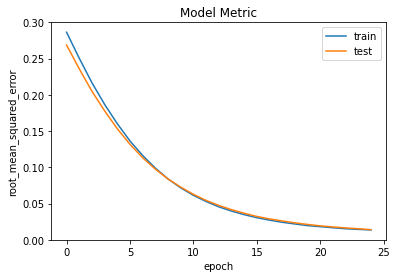

In [ ]:
#melihat visualisasi proses training
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model Metric')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper ledt')
plt.show()

**Mendapatkan Rekomendasi Post**

In [ ]:
post_df = fix_post
df = pd.read_csv('/content/drive/MyDrive/Dataset/Rekomendasi_Posting/post_data.csv')

user_id = data.user_id.sample(1).iloc[0]
post_user = data[data.user_id == user_id]

post_not = post_df[~post_df['post_id'].isin(post_user.post_id.values)]['post_id']
post_not = list(
    set(post_not)
    .intersection(set(post_to_post_encoded.keys()))
)

post_not = [[post_to_post_encoded.get(x)] for x in post_not]
user_encoder = user_to_user_encoded.get(user_id)
user_post_array = np.hstack(
    ([[user_encoder]] * len(post_not), post_not)
)

In [ ]:
#untuk memperoleh rekomendasi restoran, gunakan fungsi model.predict()
posts = model.predict(user_post_array).flatten()

top_posts_indices = posts.argsort()[-5:][::-1]
recommended_post_id = [
        post_encoded_to_post.get(post_not[x][0]) for x in top_posts_indices
]

print('Menampilkan Rekomendasi untuk user: {}'.format(user_id))
print('=' * 50)
print('Posting dengan peringkat tinggi dari user')
print('-' * 50)

# mencari rekomendasi post 
top_post_user =(
    post_user.sort_values(
        by = 'category',
        ascending=False
    )
    .head(5)
    .post_id.values
)

post_df_rows = post_df[post_df['post_id'].isin(top_post_user)]
for row in post_df_rows.itertuples():
  print(row.title	, ':', row.category)

print('-' * 50)
print('Rekomendasi terbaik')
print('-' * 50)

recommended_post = post_df[post_df['post_id'].isin(recommended_post_id)]
for row in recommended_post.itertuples():
  print(row.title, ':', row.category)

Menampilkan Rekomendasi untuk user: 5eece14ffc13ae660900008d
Posting dengan peringkat tinggi dari user
--------------------------------------------------
 9 Ways ZOOLOGY Can Make You Invincible : zoology
 9 Ways ZOOLOGY Can Make You Invincible : zoology
 3 Things Everyone Knows About ZOOLOGY That You Don't : zoology
 How To Win Clients And Influence Markets with ZOOLOGY : zoology
 9 Ways ZOOLOGY Can Make You Invincible : zoology
 How To Win Clients And Influence Markets with ZOOLOGY : zoology
 3 Things Everyone Knows About ZOOLOGY That You Don't : zoology
ZOOLOGY And Love Have 4 Things In Common : zoology
 3 Things Everyone Knows About ZOOLOGY That You Don't : zoology
 How To Win Clients And Influence Markets with ZOOLOGY : zoology
 How To Win Clients And Influence Markets with ZOOLOGY : zoology
 3 Things Everyone Knows About ZOOLOGY That You Don't : zoology
 9 Ways ZOOLOGY Can Make You Invincible : zoology
 9 Ways ZOOLOGY Can Make You Invincible : zoology
 3 Things Everyone Knows Abou